## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### info on the columns in the datset
SHOW-ID - Unique id of each show (not much of a use for us in this notebook)

TYPE - The category of a show, can be either a Movie or a TV Show

TITLE - Name of the show

DIRECTOR - Name of the director(s) of the show

CAST - Name of the show

COUNTRY - Name of countries the show is available to watch on Netflix

DATE ADDED - Date when the show was added on Netflix

RATING - Show rating on netflix

RELEASE YEAR - Release year of the show

DURATION - Time duration of the show

LISTED IN - Genre of the show

### Importing the dataset

In [2]:
netflix = pd.read_csv('netflix_titles.csv')
netflix_num=pd.read_csv('netflix_titles.csv')

### EDA

In [3]:
# viewing the first five columns of the dataset
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [4]:
netflix.describe()

,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


In [5]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


there are 7787 rows and 12 columns<br>
11 of the columns are object, 1 column is an int<br>
there are missing values in some columns<br>


In [6]:
# viewing the number of null values in each column
netflix.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

there are missing values in the director, cast, country, date_added and rating column
### filling the missing values

In [7]:
netflix['director'] = netflix['director'].fillna('NoData')
netflix['cast'] = netflix['cast'].fillna('NoData')
netflix['country'] = netflix['country'].fillna(netflix['country'].mode()[0])
netflix['date_added'] = netflix['date_added'].fillna(netflix['date_added'].mode()[0])
netflix['rating'] = netflix['rating'].fillna(netflix['rating'].mode()[0])

In [8]:
# checking if all null values are filled
netflix.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [9]:
# checking for duplicate rows in the dataset
netflix.duplicated().sum()

0

there are no duplicate rows in the dataset

## EDA and Visualization

### Netflix Content By Type

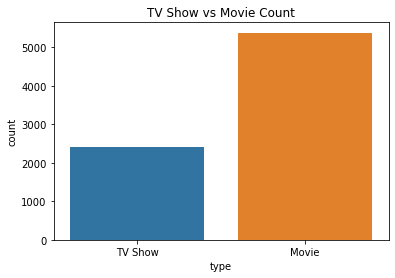

In [10]:
# chart showing the count of the type column
sns.countplot(x = 'type', data = netflix)
plt.title('TV Show vs Movie Count');

In [11]:
# count of TV Show and Movie
p = netflix['type'].value_counts()
p

Movie      5377
TV Show    2410
Name: type, dtype: int64

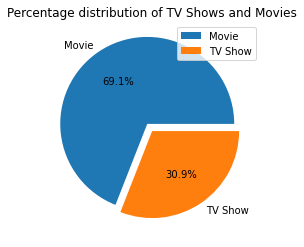

In [12]:
# pie chart showing the percentage distribution of TV Show and Movie
label = p.keys()
plt.pie(x = p, autopct = '%1.1f%%', labels =label,explode= [0.1,0])
plt.legend()
plt.title('Percentage distribution of TV Shows and Movies');

we can safely say that there are more Movies to TV Show

### Amount of Content-Type by Rating

In [13]:
# count of TV Show and Movie by rating
x = netflix['rating'].value_counts()
x

TV-MA       2870
TV-14       1931
TV-PG        806
R            665
PG-13        386
TV-Y         280
TV-Y7        271
PG           247
TV-G         194
NR            84
G             39
TV-Y7-FV       6
UR             5
NC-17          3
Name: rating, dtype: int64

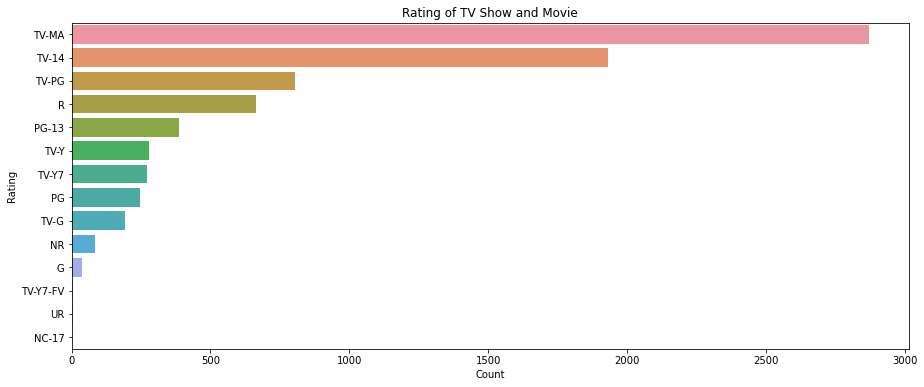

In [14]:
# bar plot showing the count of content-type (TV Show and Movie) by rating
plt.figure(figsize=(15,6))
sns.barplot(x= x.values, y = x.index)
plt.ylabel('Rating')
plt.xlabel('Count')
plt.title('Rating of TV Show and Movie');

In [15]:
# count of TV Show by rating
x = netflix[netflix['type']=='TV Show']['rating'].value_counts()
x

TV-MA       1020
TV-14        659
TV-PG        301
TV-Y7        176
TV-Y         163
TV-G          83
NR             5
R              2
TV-Y7-FV       1
Name: rating, dtype: int64

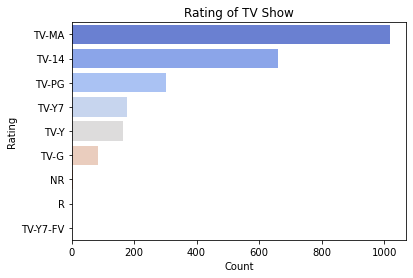

In [16]:
# bar plot showing the amount of count of TV Show by rating
sns.barplot(x= x.values, y = x.index,palette='coolwarm')
plt.title('Rating of TV Show')
plt.ylabel('Rating')
plt.xlabel('Count');

In [17]:
# count of Movie by rating
x = netflix[netflix['type']=='Movie']['rating'].value_counts()
x

TV-MA       1850
TV-14       1272
R            663
TV-PG        505
PG-13        386
PG           247
TV-Y         117
TV-G         111
TV-Y7         95
NR            79
G             39
TV-Y7-FV       5
UR             5
NC-17          3
Name: rating, dtype: int64

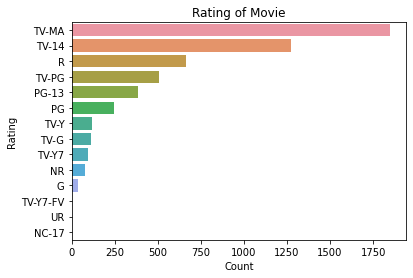

In [18]:
# bar plot showing the count of Movie by rating
sns.barplot(x= x.values, y = x.index,)
plt.title('Rating of Movie')
plt.ylabel('Rating')
plt.xlabel('Count');

TV-MA has the highest amount of rating in TV Show and Movie

### Amount of Content-type by Country

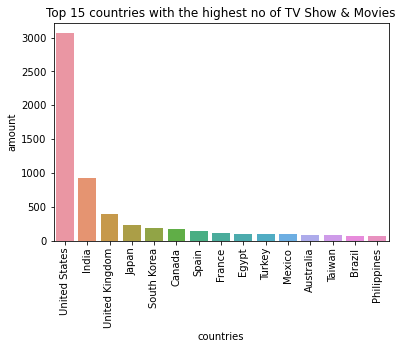

In [19]:
# countries with the highest no of content
x = netflix['country'].value_counts().head(15)
sns.barplot(x = x.index, y = x.values)
plt.xticks(rotation= 90)
plt.xlabel('countries')
plt.ylabel('amount')
plt.title('Top 15 countries with the highest no of TV Show & Movies');

United States has the highest amount of Content

### Amount of Content-type Added Over the Years

In [20]:
#creating a new column year_added from date_added
netflix['year_added'] = netflix['date_added'].apply(lambda x:x.split(' ')[-1])
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added
0,s1,TV Show,3%,NoData,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020


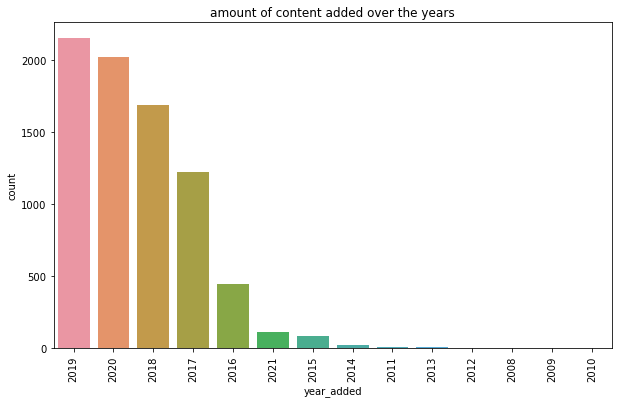

In [21]:
# amount of content added over the years
plt.figure(figsize = (10,6))
orders=netflix['year_added'].value_counts().index
sns.countplot(x = 'year_added',data= netflix, order =orders)
plt.title('amount of content added over the years')
plt.xticks(rotation = 90);

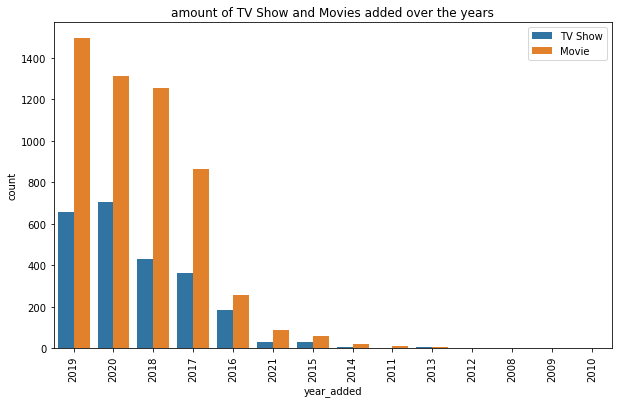

In [22]:
# amount of content added over the years by type
plt.figure(figsize = (10,6))
sns.countplot(x = 'year_added',data= netflix, hue = 'type',order = orders)
plt.title('amount of TV Show and Movies added over the years')
plt.xticks(rotation = 90);
plt.legend(loc='upper right');

we can conclude that the amount of content uploaded by netflix significantly increased after 2013 with Movies higher than TV Shows. a decline could be seen after 2019 could be as a result of the covid 19 outbreak

### Amount of Content-type released over the years

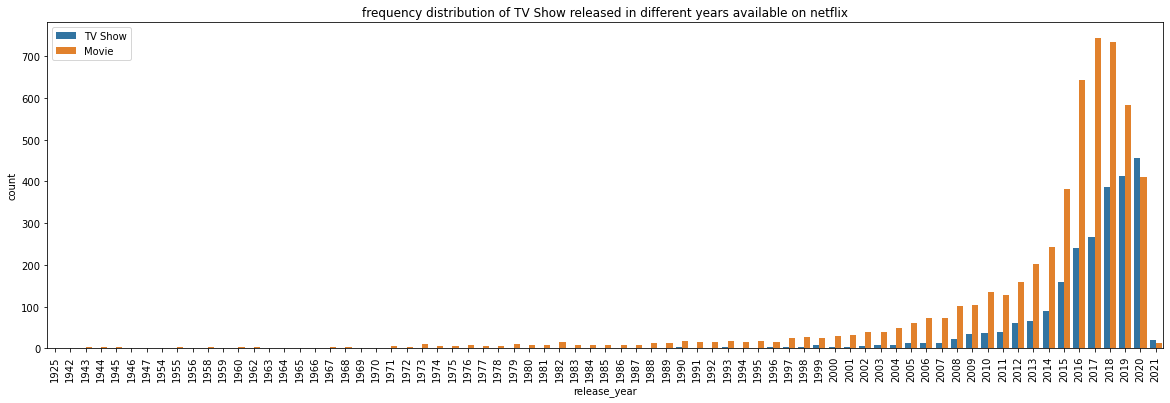

In [23]:
plt.figure(figsize=(20,6))
sns.countplot(x='release_year', data = netflix, hue = 'type')
# netflix[netflix["type"]=="TV Show"]["release_year"].value_counts().plot.bar()
plt.title('frequency distribution of TV Show released in different years available on netflix')
plt.xticks(rotation=90)
plt.legend(loc='upper left');

there has been an increase in the amount of content released over the years
However, a decline in the number of Movies released could be seen after 2018
the number of TV Shows released declined in 2021. these decline may be due to covid 19 outbreak

### Top 20 Directors

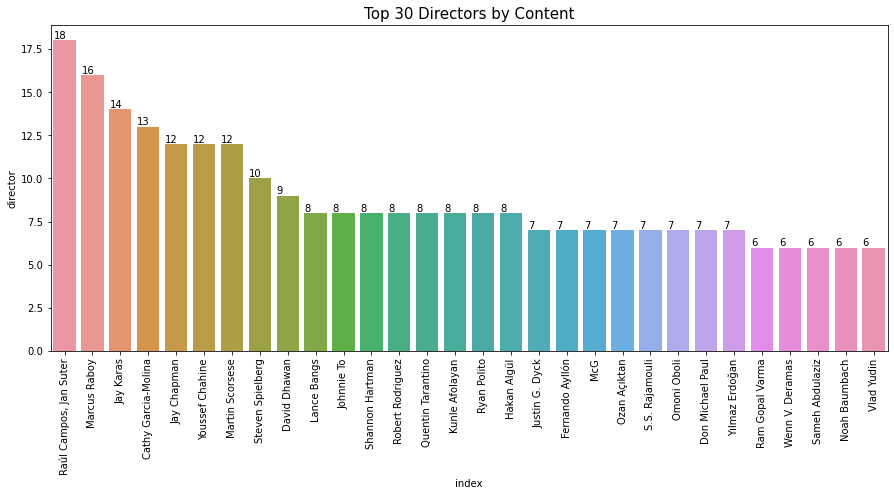

In [24]:
# top 30 directors by content

x = netflix['director'].value_counts().reset_index()[1:31]
plt.figure(figsize = (15,6))
ax = sns.barplot(x=x['index'],y = x['director'])
plt.xticks(rotation = 90)
plt.title('Top 30 Directors by Content', fontsize = 15)
for i in ax.patches:
    ax.text(i.get_x()+.01,i.get_height()+0.1,str(int((i.get_height()))),
            rotation=0,fontsize=10,color='black');

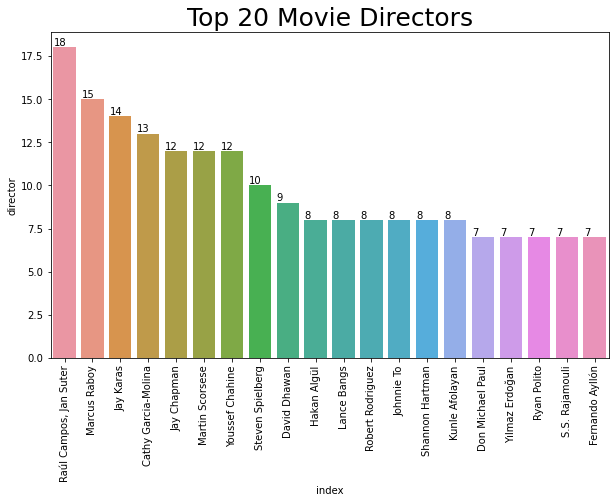

In [25]:
# top 20 Movie Directors
x = netflix[netflix['type']=='Movie']['director'].value_counts().reset_index()[1:21]
plt.figure(figsize=(10,6))
ax = sns.barplot(x= x['index'], y= x['director'])
plt.xticks(rotation = 90);
plt.title('Top 20 Movie Directors', fontsize = 25);
for i in ax.patches:
    ax.text(i.get_x()+.01,i.get_height()+0.1,str(int((i.get_height()))),
            rotation=0,fontsize=10,color='black');

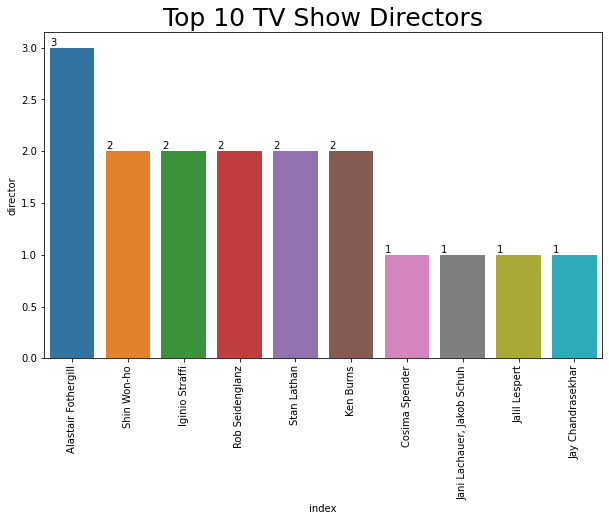

In [26]:
# top 10 TV show Director
x = netflix[netflix['type']=='TV Show']['director'].value_counts().reset_index()[1:11]
plt.figure(figsize =(10,6))
ax=sns.barplot(x= x['index'], y=x['director'])
plt.title('Top 10 TV Show Directors',fontsize=25)
plt.xticks(rotation = 90, fontsize= 10)
for i in ax.patches:
    ax.text(i.get_x()+0.01,i.get_height()+0.02,str(int((i.get_height()))),
            rotation=0,fontsize=10,color='black');

### Top 20 Genre

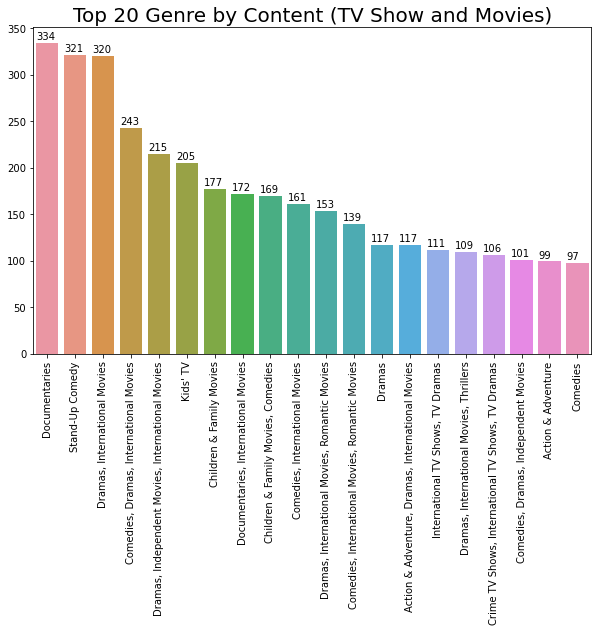

In [27]:
# top 20 genre in content
x= netflix['listed_in'].value_counts().head(20)
plt.figure(figsize = (10,6))
ax = sns.barplot(x = x.index, y = x.values)
plt.xticks(rotation = 90)
plt.title('Top 20 Genre by Content (TV Show and Movies)', fontsize = 20);
for i in ax.patches:
    ax.text(i.get_x()+0.01,i.get_height()+4,str(int((i.get_height()))),
            rotation=0,fontsize=10,color='black');

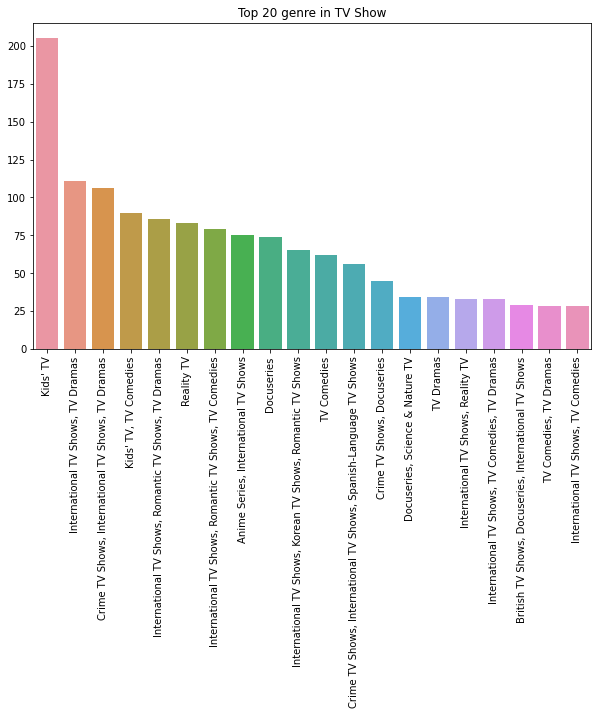

In [28]:
# top 20 genre in TV Show
x = netflix[netflix['type']=='TV Show']['listed_in'].value_counts().head(20)
plt.figure(figsize = (10,6))
sns.barplot(x= x.index, y = x.values)
plt.title('Top 20 genre in TV Show')
plt.xticks(rotation = 90);

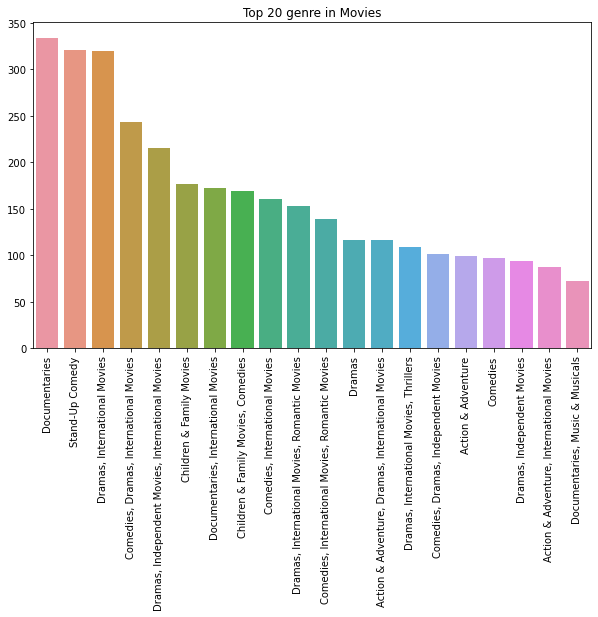

In [29]:
# top 20 genre in Movies
x = netflix[netflix['type']== 'Movie']['listed_in'].value_counts().head(20)
plt.figure(figsize = (10,6))
sns.barplot(x= x.index, y = x.values)
plt.title('Top 20 genre in Movies')
plt.xticks(rotation = 90);

Documentries have the highest Genre in Movies

Kids Tv have the highest Genre in TV Show

### Top 20 Actors

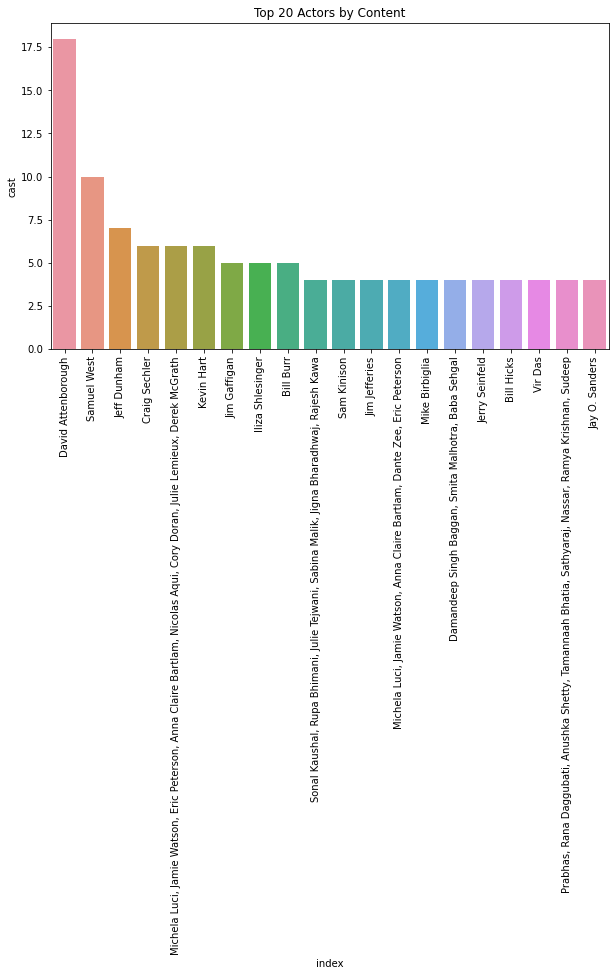

In [30]:
# top 20 Actors by Content
x = netflix['cast'].value_counts().reset_index()[1:21]
plt.figure(figsize = (10,6))
sns.barplot(x= x['index'], y = x['cast'])
plt.title('Top 20 Actors by Content')
plt.xticks(rotation = 90);

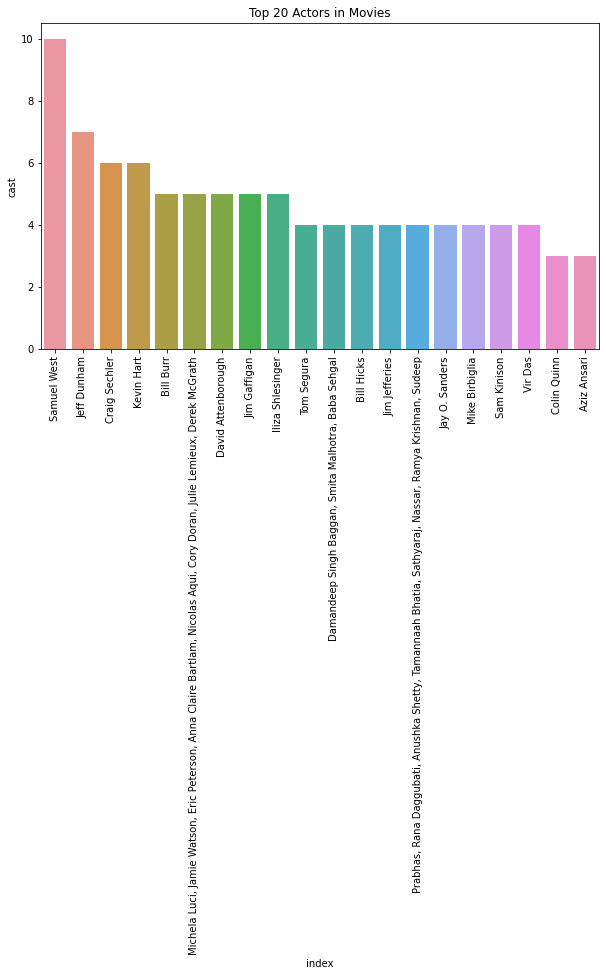

In [31]:
# top 20 Actors in Movies
x = netflix[netflix['type']== 'Movie']['cast'].value_counts().reset_index()[1:21]
plt.figure(figsize = (10,6))
sns.barplot(x= x['index'], y = x['cast'])
plt.title('Top 20 Actors in Movies')
plt.xticks(rotation = 90);

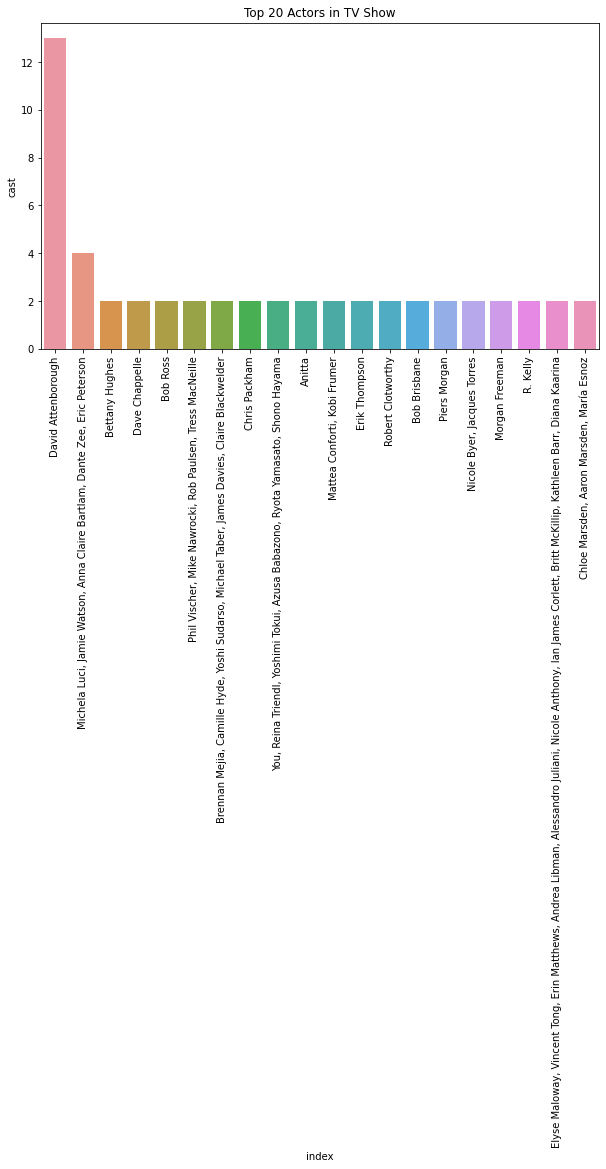

In [32]:
# top 20 Actors in TV Show
x = netflix[netflix['type']== 'TV Show']['cast'].value_counts().reset_index()[1:21]
plt.figure(figsize = (10,6))
sns.barplot(x= x['index'], y = x['cast'])
plt.title('Top 20 Actors in TV Show')
plt.xticks(rotation = 90);